In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm

%matplotlib inline
plt.style.use('seaborn')

# importing the data set

In [2]:
dataset = pd.read_csv("school_outcome.csv", index_col=0)
dataset.head(3)

,UsableWaterSource_Category_EduTrac,TeachersRegistered_Value_EduTrac,TeachersPresent_Value_EduTrac,TeacherTraining_Category_EduTrac,TeachersGovPayroll_Value_EduTrac,UsableLatrine_Category_EduTrac,BoysEnrolled_Value_EduTrac,BoysToday_Value_EduTrac,GirlsEnrolled_Value_EduTrac,GirlsToday_Value_EduTrac,...,teach_chair_brok_rep,teach_chair_brok_notrep,chalk_board_good,chalk_board_brok_rep,chalk_board_brok_notrep,sch_dev_plan,sch_bank_account,Pass,Sat,learning_rate
emiscode,,,,,,,,,,,,,,,,,,,,,
310503206,Yes,4.0,1,No,2,Yes,198,0,123,0,...,4,1,1,6,2,Yes,Yes,100,11,0
311501201,Yes,7.0,7,Yes,6,Yes,0,0,0,0,...,0,0,6,0,0,Yes,Yes,62,26,0
311303206,No,6.0,4,Yes,5,Yes,13,13,8,8,...,1,1,3,2,1,Yes,Yes,59,17,0


In [3]:
Catedorical = pd.read_csv("categorical.csv", index_col=0)
Numerical = pd.read_csv("numeric.csv", index_col=0)
Numerical.corr()

,TeachersRegistered_Value_EduTrac,girls_latrine,boys_latrine,shared_latrine,solid_class,solid_class_repair,semi_solid_class,semi_solid_class_repair,chair_good_cond,chair_brok_rep,...,teach_good_desk,teach_desk_brok_rep,teach_desk_brok_notrep,teach_good_chair,teach_chair_brok_rep,teach_chair_brok_notrep,chalk_board_good,chalk_board_brok_rep,chalk_board_brok_notrep,learning_rate
TeachersRegistered_Value_EduTrac,1.000000,0.061704,0.059404,0.014087,0.163723,0.082171,0.028327,0.006430,0.113471,0.100082,...,0.082116,0.046548,0.023931,0.136029,0.086938,0.060464,0.176967,0.051570,-0.021467,-0.032695
girls_latrine,0.061704,1.000000,0.740702,-0.047265,0.226062,0.130275,-0.059315,-0.073180,0.162888,0.132348,...,0.101036,0.071215,0.009269,0.122622,0.094363,0.069240,0.187845,0.023419,-0.058833,-0.062337
boys_latrine,0.059404,0.740702,1.000000,-0.002771,0.235556,0.133936,-0.042175,-0.057472,0.170857,0.070672,...,0.100459,0.070061,0.016440,0.166654,0.096968,0.053228,0.196110,0.023082,-0.049882,-0.058793
shared_latrine,0.014087,-0.047265,-0.002771,1.000000,0.084082,0.045516,-0.019227,-0.049970,0.037848,0.030122,...,0.040558,0.004356,-0.011870,0.035866,0.025608,-0.009716,0.094718,-0.041216,-0.034030,-0.013580
solid_class,0.163723,0.226062,0.235556,0.084082,1.000000,0.610043,-0.493909,-0.472604,0.432009,0.307168,...,0.280778,0.119079,0.039133,0.358182,0.181967,0.073735,0.579144,0.097129,-0.060560,-0.059741
solid_class_repair,0.082171,0.130275,0.133936,0.045516,0.610043,1.000000,-0.370804,-0.340171,0.234875,0.197758,...,0.097097,0.093772,0.086867,0.153068,0.134618,0.116176,0.224607,0.172870,0.038074,-0.033045
semi_solid_class,0.028327,-0.059315,-0.042175,-0.019227,-0.493909,-0.370804,1.000000,0.868409,-0.080985,-0.072769,...,-0.069356,-0.004596,0.026856,-0.059317,-0.006632,0.053111,0.001497,0.077840,0.096841,-0.004777
semi_solid_class_repair,0.006430,-0.073180,-0.057472,-0.049970,-0.472604,-0.340171,0.868409,1.000000,-0.105884,-0.073987,...,-0.093981,0.011398,0.034634,-0.088243,0.000325,0.055271,-0.076829,0.104530,0.115427,0.000748
chair_good_cond,0.113471,0.162888,0.170857,0.037848,0.432009,0.234875,-0.080985,-0.105884,1.000000,0.598698,...,0.142235,0.058820,0.016822,0.244468,0.120781,0.069701,0.308936,0.063880,0.067054,-0.025484
chair_brok_rep,0.100082,0.132348,0.070672,0.030122,0.307168,0.197758,-0.072769,-0.073987,0.598698,1.000000,...,0.088337,0.166176,0.071902,0.102780,0.205029,0.100320,0.197675,0.077305,0.032862,-0.033891


In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Catedorical = Catedorical.apply(labelencoder.fit_transform)
Counts_FeaturesAndLearningRate.head(2)

NameError: name 'Counts_FeaturesAndLearningRate' is not defined

# Nature of schools
- we explore school owners and status of their schools
- number of teachers in different school types

In [5]:
schools = dataset[['Pass','Sat', 'learning_rate', 'sch_type', 'feeder_school','sch_owner', 'remoteness','mixed_school','approval_status',
                   'TeachersPresent_Value_EduTrac','TeacherTraining_Category_EduTrac', 'TeachersGovPayroll_Value_EduTrac','fin_support', 'shift_status','non_formal_sch',
       'other_sch_shifts']]
# school_types = list(schools['shift_status'].value_counts()[:].index)
schools.head(3)

,Pass,Sat,learning_rate,sch_type,feeder_school,sch_owner,remoteness,mixed_school,approval_status,TeachersPresent_Value_EduTrac,TeacherTraining_Category_EduTrac,TeachersGovPayroll_Value_EduTrac,fin_support,shift_status,non_formal_sch,other_sch_shifts
emiscode,,,,,,,,,,,,,,,,
310503206,100,11,0,Primary,No,Mission/religious group,Rough terrains,Mixed,Approved,1,No,2,Yes,Single shift,No,No
311501201,62,26,0,Primary,No,Government,Easily accessible,Mixed,Approved,7,Yes,6,Yes,Single shift,No,Yes
311303206,59,17,0,Primary,No,Mission/religious group,Easily accessible,Mixed,Approved,4,Yes,5,Yes,Single shift,No,No


In [6]:
schools.groupby(['sch_type', 'sch_owner','mixed_school','approval_status']).size().reset_index(name='counts')

,sch_type,sch_owner,mixed_school,approval_status,counts
0,Junior Secondary,Community,Girls only,Approved,1
1,Junior Secondary,Community,Mixed,Applied for Approval,8
2,Junior Secondary,Community,Mixed,Approved,59
3,Junior Secondary,Community,Mixed,Not Approved,18
4,Junior Secondary,Government,Boys only,Approved,6
5,Junior Secondary,Government,Girls only,Approved,8
6,Junior Secondary,Government,Mixed,Approved,64
7,Junior Secondary,Government,Mixed,Not Approved,3
8,Junior Secondary,Mission/religious group,Boys only,Applied for Approval,1
9,Junior Secondary,Mission/religious group,Boys only,Approved,11


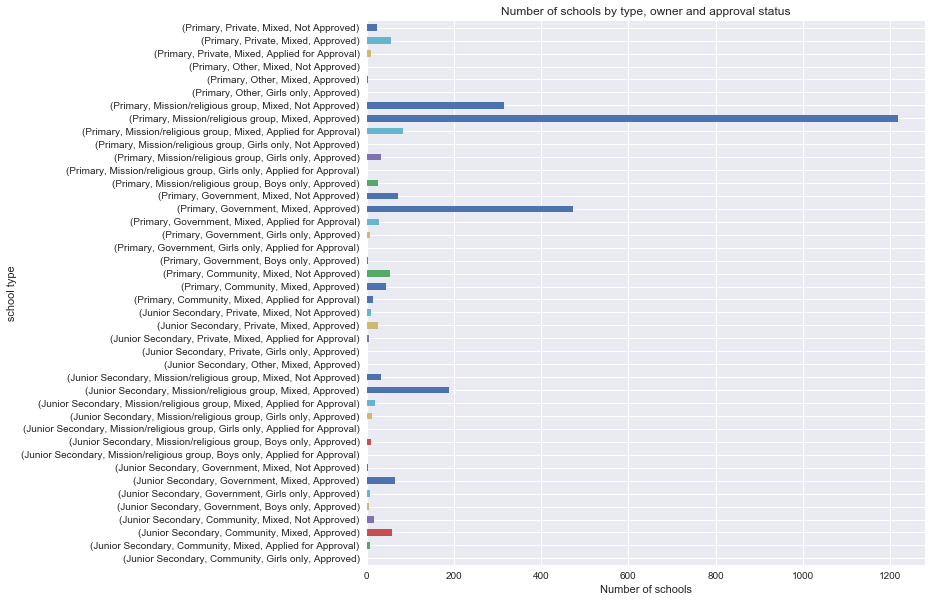

In [6]:
plt.figure(figsize=(10,10))
schools.groupby(['sch_type', 'sch_owner','mixed_school','approval_status']).size().plot(kind='barh')
plt.title('Number of schools by type, owner and approval status')
plt.ylabel('school type')
plt.xlabel('Number of schools')
plt.show()

In [7]:
schoolTeachers_LearningRate = dataset[['Pass','Sat', 'learning_rate', 'sch_type','sch_owner','TeachersPresent_Value_EduTrac','TeacherTraining_Category_EduTrac', 
                                       'TeachersGovPayroll_Value_EduTrac','non_formal_sch','BoysEnrolled_Value_EduTrac','GirlsEnrolled_Value_EduTrac']]

In [8]:
NumOfTeachers = pd.pivot_table(schoolTeachers_LearningRate, values=['TeachersPresent_Value_EduTrac'],
                                index=['sch_type','sch_owner'], 
                               columns=['non_formal_sch'], aggfunc=np.size, margins=True, margins_name = 'Total')
NumOfTeachers

TeachersPresent_Value_EduTrac       \
non_formal_sch                                                      No  Yes   
sch_type         sch_owner                                                    
Junior Secondary Community                                          79    7   
                 Government                                         74    7   
                 Mission/religious group                           251   16   
                 Other                                               1    1   
                 Private                                            40    3   
Primary          Community                                         108    6   
                 Government                                        545   41   
                 Mission/religious group                          1596   83   
                 Other                                               4    1   
                 Private                                            77   13   
Total                                                             2775  178   

                                                
non_formal_sch                           Total  
sch_type         sch_owner                      
Junior Secondary Community                  86  
                 Government                 81  
                 Mission/religious group   267  
                 Other                       2  
                 Private                    43  
Primary          Community                 114  
                 Government                586  
                 Mission/religious group  1679  
                 Other                       5  
                 Private                    90  
Total                                     2953

<Figure size 1080x1080 with 0 Axes>

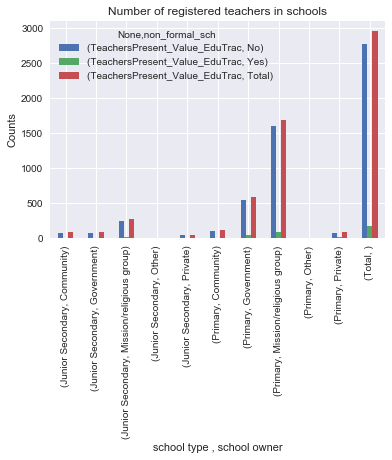

In [9]:
plt.figure(figsize=(15,15))
NumOfTeachers.plot(kind='bar')
plt.title('Number of registered teachers in schools')
plt.ylabel('Counts')
plt.xlabel('school type , school owner')
plt.show()

Text(0.5,1,'Pie chart for learning rates counts')

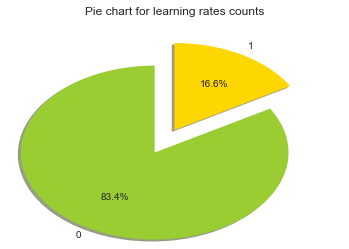

In [10]:
Learning_rate_counts = schoolTeachers_LearningRate.groupby(['learning_rate']).size()
labels = '0', '1'
colors = ['yellowgreen', 'gold']
explode = (0.3, 0)
plt.pie(Learning_rate_counts, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Pie chart for learning rates counts')

In [8]:
Counts_FeaturesAndLearningRate = dataset[['learning_rate','boarding','library','sci_lab','canteen',
                  'fin_support','computers','non_formal_sch','sch_dev_plan','sch_bank_account']]

FeaturesAndLearningRate = (Counts_FeaturesAndLearningRate.set_index('learning_rate').groupby(level='learning_rate')
 .apply(lambda g: g.apply(pd.value_counts)).unstack(level=1).fillna(0))
FeaturesAndLearningRate

boarding     library      sci_lab     canteen     fin_support  \
                    No Yes      No  Yes      No Yes      No Yes          No   
learning_rate                                                                 
0                 2418  46    2195  269    2399  65    2380  84         580   
1                  486   3     447   42     484   5     481   8         119   

                    computers     non_formal_sch      sch_dev_plan        \
                Yes        No Yes             No  Yes           No   Yes   
learning_rate                                                              
0              1884      2378  86           2309  155          375  2089   
1               370       478  11            466   23           98   391   

              sch_bank_account        
                            No   Yes  
learning_rate                         
0                          141  2323  
1                           37   452

<Figure size 1080x1080 with 0 Axes>

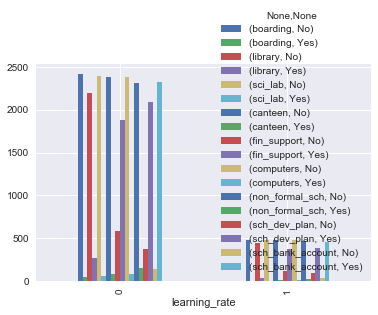

In [9]:
plt.figure(figsize=(15,15))
FeaturesAndLearningRate.plot(kind='bar')
plt.show()

# correlations
- new features are selected
- categorical varaibles are encoded
- correlation matrix and the plot

In [10]:
# DatasetForCorrelations = dataset[['learning_rate','boarding','library', 'sci_lab',
#                                   'canteen','fin_support','computers','chalk_board_good']]
# # boarding = list(DatasetForCorrelations['boarding'].value_counts())
# # boarding
# DatasetForCorrelations.head(2)
Counts_FeaturesAndLearningRate.head(2)

,learning_rate,boarding,library,sci_lab,canteen,fin_support,computers,non_formal_sch,sch_dev_plan,sch_bank_account
emiscode,,,,,,,,,,
310503206,0,No,No,No,No,Yes,No,No,Yes,Yes
311501201,0,No,No,No,No,Yes,No,No,Yes,Yes


In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Counts_FeaturesAndLearningRate.iloc[:,1:10] = Counts_FeaturesAndLearningRate.iloc[:,1:10].apply(labelencoder.fit_transform)
Counts_FeaturesAndLearningRate.head(2)

c:\users\henry\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,learning_rate,boarding,library,sci_lab,canteen,fin_support,computers,non_formal_sch,sch_dev_plan,sch_bank_account
emiscode,,,,,,,,,,
310503206,0,0,0,0,0,1,0,0,1,1
311501201,0,0,0,0,0,1,0,0,1,1


In [13]:
correlations = Counts_FeaturesAndLearningRate.corr(method='pearson')
correlations

,learning_rate,boarding,library,sci_lab,canteen,fin_support,computers,non_formal_sch,sch_dev_plan,sch_bank_account
learning_rate,1.000000,-0.036472,-0.028194,-0.039474,-0.037936,-0.006965,-0.025876,-0.024788,-0.048868,-0.028801
boarding,-0.036472,1.000000,0.102248,0.171444,0.129292,0.028681,0.154538,0.033932,0.020590,-0.000517
library,-0.028194,0.102248,1.000000,0.352639,0.268668,-0.034736,0.314327,0.019717,0.050577,-0.015082
sci_lab,-0.039474,0.171444,0.352639,1.000000,0.318000,-0.033676,0.295997,-0.002052,0.037704,-0.007301
canteen,-0.037936,0.129292,0.268668,0.318000,1.000000,-0.078977,0.240344,0.052860,0.025170,-0.028291
fin_support,-0.006965,0.028681,-0.034736,-0.033676,-0.078977,1.000000,-0.089571,-0.016288,0.071761,0.367764
computers,-0.025876,0.154538,0.314327,0.295997,0.240344,-0.089571,1.000000,0.065085,0.049403,-0.057102
non_formal_sch,-0.024788,0.033932,0.019717,-0.002052,0.052860,-0.016288,0.065085,1.000000,0.001984,-0.031509
sch_dev_plan,-0.048868,0.020590,0.050577,0.037704,0.025170,0.071761,0.049403,0.001984,1.000000,0.044569
sch_bank_account,-0.028801,-0.000517,-0.015082,-0.007301,-0.028291,0.367764,-0.057102,-0.031509,0.044569,1.000000


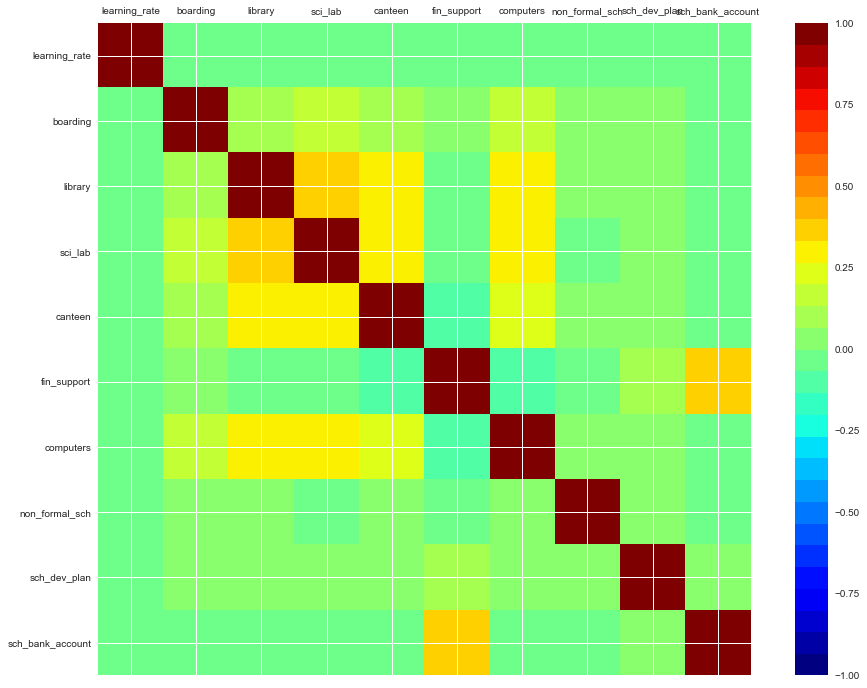

In [65]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax.matshow(correlations,cmap=cmap, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(Counts_FeaturesAndLearningRate.columns)
ax.set_yticklabels(Counts_FeaturesAndLearningRate.columns)
plt.show()

# Feature selection
Recursive Feature Elimination

In [14]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [15]:
X = Counts_FeaturesAndLearningRate.iloc[:,1:10]
Y = Counts_FeaturesAndLearningRate.iloc[:,0]

# feature extraction
model = SVC(kernel="linear")
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)

In [16]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [False  True  True  True  True False False False  True]
Feature Ranking: [5 1 1 1 1 4 2 3 1]


In [77]:
Counts_FeaturesAndLearningRate.head(2)

,learning_rate,boarding,library,sci_lab,canteen,fin_support,computers,non_formal_sch,sch_dev_plan,sch_bank_account
emiscode,,,,,,,,,,
310503206,0,0,0,0,0,1,0,0,1,1
311501201,0,0,0,0,0,1,0,0,1,1


In [78]:
# selcted features
boarding, library, sci_lab, canteen, bankaccount


# Machine learning
- support vector machine
- sampling of imbalanced classifications
- encodeing of variables

In [17]:
NewDataset_SelectedFeatures = Counts_FeaturesAndLearningRate[['learning_rate','boarding', 'library', 'sci_lab', 'canteen', 'sch_bank_account']]

In [19]:
count_class_0, count_class_1 = NewDataset_SelectedFeatures['learning_rate'].value_counts()
df_class_0 = NewDataset_SelectedFeatures[NewDataset_SelectedFeatures['learning_rate'] == 0]
df_class_1 = NewDataset_SelectedFeatures[NewDataset_SelectedFeatures['learning_rate'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.head(5)

,learning_rate,boarding,library,sci_lab,canteen,sch_bank_account
emiscode,,,,,,
240403313,0,0,0,0,0,1
240701205,0,0,0,0,0,1
341001208,0,0,0,0,0,1
111302205,0,0,0,0,0,1
129102318,0,0,0,0,0,1


In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_test_under.iloc[:,1:6] = df_test_under.iloc[:,1:6].apply(labelencoder.fit_transform)
df_test_under.head(5)

,learning_rate,boarding,library,sci_lab,canteen,sch_bank_account
emiscode,,,,,,
240403313,0,0,0,0,0,1
240701205,0,0,0,0,0,1
341001208,0,0,0,0,0,1
111302205,0,0,0,0,0,1
129102318,0,0,0,0,0,1


In [22]:
#training the svm
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X = df_test_under.iloc[:,1:6].values
y = df_test_under.iloc[:, 0].values

#split test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting SVM to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

c:\users\henry\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Confusion matrix results:", cm)

Accuracy: 49.39%
Confusion matrix results: [[115   8]
 [116   6]]
